# Introduction

https://www.compadre.org/PICUP/exercises/Exercise.cfm?A=boltzmann&S=3

The Boltzmann distribution is fundamental to statistical thermodynamics. It states that the probability of a thermal system in an
energy state $E_n$ at temperature $T$ is

\begin{equation}
P_n=C \exp(-E_n/kT), 
\end{equation}


where \(C\) is a normalization
constant. We can choose $C$ to ensure
$$\sum_n P_n = 1$$

The Einstein model of solids is a simplified but highly useful model. In this model we assume a solid is made up of $N$ harmonic oscillators. Each oscillator can store $E_n=q\epsilon$ amount of energy, with $q=n=0,1,2,…$ being an integer and $\epsilon$ a unit (quantum) of energy. 

This model is analytically solvable. For a large solid N≫1, the average energy $\bar q$ is related to temperature $T$
by 

\begin{equation}
\bar q = \frac{1}{\exp(\epsilon/kT)-1},
\end{equation}

where
$k$ is the Boltzmann constant. Solving for temperature gives us

\begin{equation}
kT = \frac{\epsilon}{\ln(1+1/\bar q)}. 
\end{equation}


In the simulation, we
will set $\epsilon =1$ without loss of generality.

# Part 1

In a thermal system, we have many atoms and molecules exchanging energy with each other via mutual interactions in order to reach equilibrium. To mimic such a system, let us play a thought money-swap game among N people in the room. Everyone starts with 10 gold coins. The rules are: In each turn, we randomly select a person, Amy, to give a coin to another randomly-selected person, Bob. If Amy has coins in her possession, she gives one to Bob. If Amy has no coins, pick a different donor. Repeat the turns many times. What is the wealth distribution (number of coins each person has) in the end?

A: equally distributed (everyone has roughly the same average 10 coins)

B: rich-poor divide (a few rich people but many poor ones)

C: bell-shaped curve (most people in the middle)

D: not sure (random outcome)

Make a prediction, and write it down.

# Part 2

Now simulate this same game. We will use a 2-D solid containing $N$ cells. Start with all cells containing the same amount of energy. Randomly pick a pair of cells using the rules above, and exchange energy. Repeat L times, where L is the number of interactions (say 100) times the number of cells. 

At the end, there will be a fraction of cells containing energy each energy, $E_n$. Note that we have set $\epsilon = 1$ so our energy levels are just the integers $E_n = 1,2,3,...$ 

Our simulated probablilty distribution $P_n$ is just the fraction of cells with energy with each value of q. So, after running the simulation, just count up the cells at each energy level (ie each value of n), divide by $N$, and that's $P_n$. This should match the theoretical function above.

We can also add error bars to our probablilty distribution, where the error is given by $\xi = \sqrt{P_n/N}$. 

In [ ]:
import random as rnd
import matplotlib.pyplot as plt, numpy as np
from numpy import arange, log,exp, zeros, ones, sum
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot

Create a subroutine to execute the rules of the exchange. 

solid is an input array containing the energy state of each cell in the solid. 

N is the number of cells

L is the number of interations

Get the a random cell index using rnd.randint(a, b) to generate a random integer $a \le i \le b$. Careful: for an array with dimension N, what is the smallest index? What is the largest index?

Experiment with this bit of code to see how randint works

In [4]:
# x=arange(0,10)
# i = rnd.randint(   ) # fill in the blank
# print(i, x[i])

Experiment with a while loop

In [5]:
# x=arange(0,10)
# i=0
# print(i, x[i])
# while x[i]!=4:
#     i=rnd.randint()
#     print(i, x[i])

Use these to build the function

In [15]:
def exchange(solid, N, L):               # iterate L times
    for i in range(L):
        take = rnd.randint(0, N-1) # random pair
        give = rnd.randint(0, N-1) 
        while solid[take] == 0:     # find a nonzero-energy cell
            take = rnd.randint(0, N-1)

        solid[take] -= 1            # exchange energy
        solid[give] += 1
    return solid


Now write a function to sample your solid to find the probablility distribution, that is, the fraction of cells with each energy level.  Note that we have set $\epsilon = 1$ so our energy levels are just the integers $E_n = q = 1,2,3,...,q_{max}$

To do this, find the maximum energy level in the solid and loop over the energy levels, $q$. numpy has a convienient function np.count_nonzero() that can count non-zero elements of the input. Since False is treated as zoro, this can also work with a logical statement as iput. If you have an array x, you can construct a logical array of the same size using a logic statement like x==6. You can use that as input to np.count_nonzero(). 

Try this:

In [7]:
# x = arange(10)
# x_logical = (  ) # fill in the blank with a logic statement, like x==pi.
# print(x_logical)
# print(count_nonzero(x_logical))

In [16]:
def sample(solid, N):                       # sample energy distribution
    qmax = int(np.max(solid))
    pn = zeros(qmax+1)
    for q in range(qmax+1):
        pn[q] = np.count_nonzero(solid==q)/float(N)
        
    # for q in solid:
    #     pn[int(q] = pn[q]+1/N
        
    error = np.sqrt(pn/N)                 # statistical error
    return qmax, pn, error


Here we just set up the parameters of the problem. Assume a 400 element solid with average energy of 10. Initialize solid as an arraay with all cells having qavg energy.

In [17]:
# set up solid
qavg = 10                             # avg  units of energy per oscillator
N = 400
L = N*100

# Create a list containing the N values of energy, initially qavg
solid = qavg*ones(N)


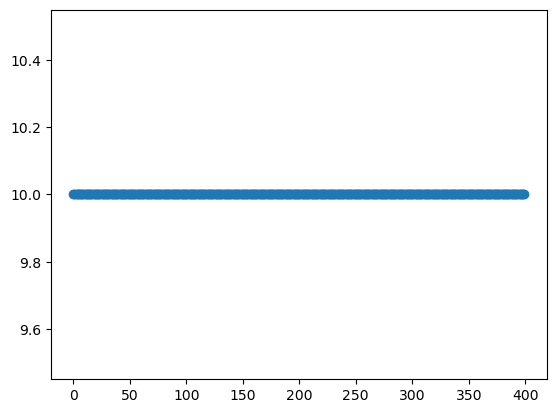

In [18]:
plot(solid, 'o')

Now use the two functions above to run the simulation and compute the probablilty distribution.

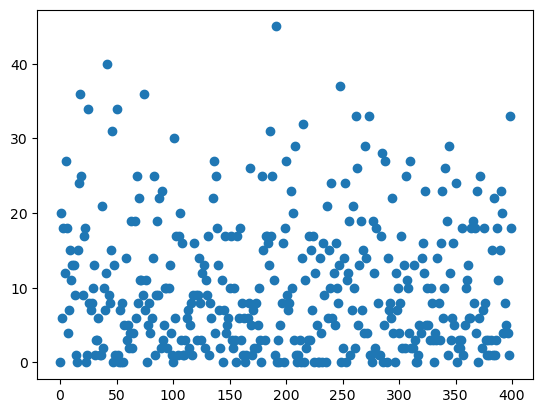

In [19]:
# Simulate
solid= exchange(solid, N, L)         # thermalize, 100 interactions per oscillator 

plot(solid, 'o')

In [ ]:
qmax, pn, error = sample(solid, N)

Finally, get the analytic solution using the equations above. 


For En, use the same sequece of values as in the simulation, $E_n = q = 1, 2, 3,...,q_{max}$. Once you fill in the array En, you can get an array pn_th just by using En in the equation for $P_n$:
\begin{equation}
P_n=C \exp(-E_n/kT), 
\end{equation}

For the arbitrary constant, C, ideally compute $\sum_k P_n$ and normalize to one: 
$$ C = \left[ \sum_k  \exp(-E_n/kT) \right]^{-1}$$
Or, just use the maximum value of our empirical result, pn, using np.max(); this just makes the graphics come out nice.


In [21]:
# analytic Boltzmann dist, qavg = 1/(exp(1/kT)-1), 1/kT=ln(1+1/qavg)
kT = 1/log(1+1./qavg)

En = arange(qmax+1)

#C = np.max(pn)
C = 1/sum(exp(-En/kT))
pn_th = C*exp(-En/kT)

No changes needed below to plot your result.

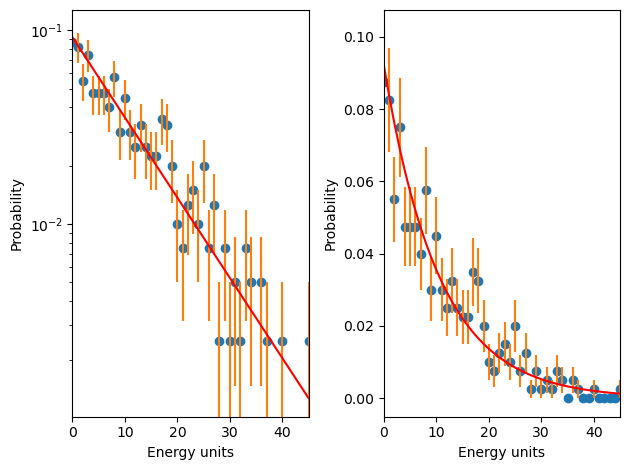

In [22]:
# Plot result
fig = plt.figure()

ax1 = subplot(1,2,1)
ax1.plot(En, pn, 'o')
ax1.errorbar(En, pn, error, ls='')
ax1.plot(En, pn_th, '-r')    #  theoretical result   
 
ax1.set_xlim(0,qmax)
ax1.set_xlabel('Energy units')
ax1.set_ylabel('Probability')
ax1.semilogy()        # semilog scale    

ax2 = subplot(1,2,2)
ax2.plot(En, pn, 'o')
ax2.errorbar(En, pn, error, ls='')
ax2.plot(En, pn_th, '-r')    #  theoretical result   
 
ax2.set_xlim(0,qmax)
ax2.set_xlabel('Energy units')
ax2.set_ylabel('Probability')

tight_layout()

# Part 3

Note the data points scatter around a straight line of the analytic result Eq. (1)
on a semilog scale for the y-axis.

From the graph, estimate the slope of the line. What is the meaning of it?
Modify the program to change the solid size to 800, 1000, and average energy $\bar q$
to 20, 30, etc. Each time obtain the slope graphically, and compare them with Eq. (3)

What does the slope depend on, N, $\bar q$, or both? Explain.
Focusing on the data error bars, what makes them smallerN, $\bar q$, or both? Explain.